In [10]:
import pandas as pd

data = pd.read_csv("../../datasets/Advertising.csv",index_col=0)
data.head()

tv  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [13]:
"""
挑战：使用 SciPy 提供的普通最小二乘法分别计算 3 个特征与目标之间的一元线性回归模型拟合参数。

规定：需使用 scipy.optimize.leastsq 函数完成计算，并直接输出函数结果无需处理。
"""

import numpy as np
from scipy.optimize import leastsq

### 代码开始 ### (≈ 10 行代码)
p_init = np.random.randn(2) #随机初始化参数值

def func(p, x): #定义一元回归模型
    w0, w1 = p
    f = w0 + w1*x
    return f

def err_func(p, x, y):  #计算残差
    ret = func(p, x) - y
    return ret

params_tv = leastsq(err_func, p_init, args=(data.tv, data.sales))
params_radio = leastsq(err_func, p_init, args=(data.radio, data.sales))
params_newspaper = leastsq(err_func, p_init, args=(data.newspaper, data.sales))
### 代码结束 ###

params_tv[0], params_radio[0], params_newspaper[0]

(array([7.03259355, 0.04753664]),
 array([9.31163809, 0.20249578]),
 array([12.35140708,  0.0546931 ]))

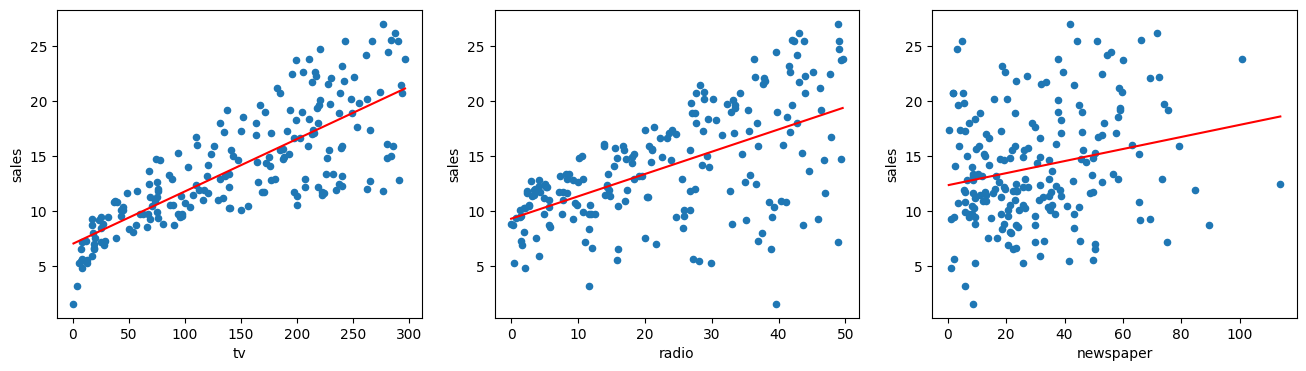

In [15]:
"""
挑战：以横向子图的方式绘制 3 个特征分别与目标之间的散点图，并添加线性拟合直线。

规定：线性拟合直线开始于散点图中最小横坐标值，结束于最大横坐标值，并以红色显示。
"""

from matplotlib import pyplot as plt
%matplotlib inline

### 代码开始 ### (≈ 10 行代码)
fig, axes = plt.subplots(1, 3, figsize=(16, 4)) 

data.plot(kind='scatter', x='tv', y='sales', ax=axes[0])
data.plot(kind='scatter', x='radio', y='sales', ax=axes[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axes[2])

x_tv = np.array([data.tv.min(), data.tv.max()])
axes[0].plot(x_tv, params_tv[0][1]*x_tv + params_tv[0][0], 'r')

x_radio = np.array([data.radio.min(), data.radio.max()])
axes[1].plot(x_radio, params_radio[0][1]*x_radio + params_radio[0][0], 'r')

x_newspaper = np.array([data.newspaper.min(), data.newspaper.max()])
axes[2].plot(x_newspaper, params_newspaper[0][1] *
             x_newspaper + params_newspaper[0][0], 'r')
### 代码结束 ###

In [16]:
"""
挑战：使用 scikit-learn 提供的线性回归方法建立由 3 个特征与目标组成的多元线性回归模型。

规定：仅能使用 scikit-learn 提供的 sklearn.linear_model.LinearRegression 类。
"""

from sklearn.linear_model import LinearRegression

## 代码开始 ### (≈ 4 行代码)
model = LinearRegression()
model.fit(X=data[["tv","radio","newspaper"]],y=data.sales)
## 代码结束 ###

model.coef_, model.intercept_  # 返回模型自变量系数和截距项



(array([ 0.04576465,  0.18853002, -0.00103749]), 2.9388893694594103)

In [19]:
"""
挑战：使用 statsmodels 库提供的相关方法来完成上面多元回归模型的拟合优度检验和变量显著性检验。

提示：你可以使用 statsmodels.api.sm.OLS 或 statsmodels.formula.api.smf，后一种实验未涉及，需自行了解学习。
"""


# # 方法一：
# import statsmodels.api as sm

# X = data[["tv","radio","newspaper"]]
# y = data.sales
# x = sm.add_constant(data)  # 添加截距项系数 1
# model = sm.OLS(endog=y, exog=X)  # 普通最小二乘法, endog 因变量, exog 自变量
# results = model.fit()
# results.params  # 输出拟合后系数

# 方法二：
import statsmodels.formula.api as smf

### 代码开始 ### (≈ 3 行代码)
results = smf.ols(formula='sales ~ tv + radio + newspaper', data=data).fit()
### 代码结束 ###

results.summary2() # 输出模型摘要


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: sales            AIC:                780.3622
Date:               2024-05-13 17:44 BIC:                793.5555
No. Observations:   200              Log-Likelihood:     -386.18 
Df Model:           3                F-statistic:        570.3   
Df Residuals:       196              Prob (F-statistic): 1.58e-96
R-squared:          0.897            Scale:              2.8409  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       2.9389    0.3119   9.4223  0.0000   2.3238  3.5540
tv              0.0458    0.0014  32.8086  0.0000   0.0430  0.0485
radio           0.1885    0.0086  21.8935  0.0000   0.1715  0.2055
newspaper      -0.0010    0.0059  -0.1767  0.8599  -0.0126  0.0105
-----------------------------------------------------------------
Omnibus:             60.414       Durbin-Watson:          2.084  
Prob(Omnibus):       0.000        Jarque-Bera (JB):       151.241
Skew:                -1.327       Prob(JB):               0.000  
Kurtosis:            6.332        Condition No.:          454    
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""